**INTERNSHIP:**GRADUATE ROTATIONAL INTERNSHIP PROGRAM( GRIP) ORGANIZED BY THE SPARK FOUNDATION

**INTERN:** ANUJ SALI

**FUNCTION:** DATA SCIENCE & BUSINESS ANALYTICS

**TASK 1:** SUPERVISED MACHINE LEARNING PROBLEM

**PROBLEM STATEMENT:** FIND SCORE FOR HOURS=9.5

# IMPORTING NECCESSARY PYTHON LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# GET THE DATA:

In [2]:
df=pd.read_csv('task1.csv')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# KNOW THE INITIAL DATA INSIGHTS: PLOTTING A HISTOGRAM

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

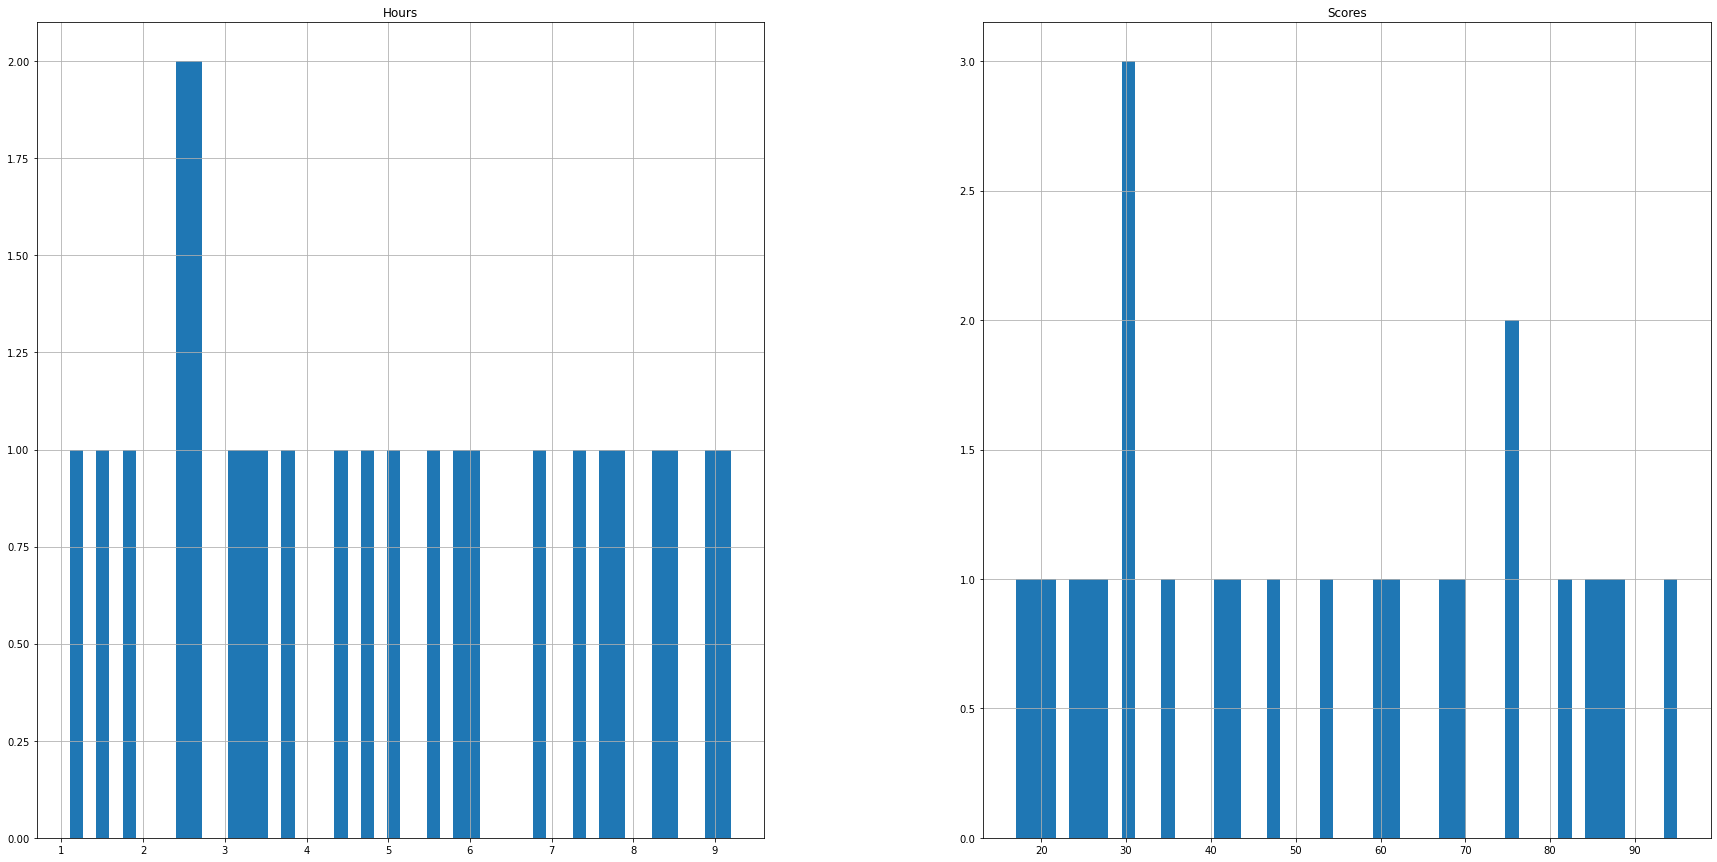

In [7]:
df.hist(bins=50,figsize=(30,15))

Insights: Corresponding to a specific score(for ex. 30),there exists multiple hours(for ex. 2.5,2.7 and 3.5)
Looking at x axis: hours range from 1.1 to 9.2
whereas scores range from 17 to 95
Lets scale the data so as to minimize the error due to this significant range difference.

# DIVISION OF DATA SET INTO TRAIN AND TEST SET:

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=0)
print('''Train Set:\n{}
         Test Set:\n{}'''.format(train_set,test_set))

Train Set:
    Hours  Scores
22    3.8      35
17    1.9      24
24    7.8      86
23    6.9      76
14    1.1      17
1     5.1      47
10    7.7      85
13    3.3      42
8     8.3      81
6     9.2      88
18    6.1      67
4     3.5      30
9     2.7      25
7     5.5      60
20    2.7      30
3     8.5      75
0     2.5      21
21    4.8      54
15    8.9      95
12    4.5      41
         Test Set:
    Hours  Scores
5     1.5      20
2     3.2      27
19    7.4      69
16    2.5      30
11    5.9      62


# Basic Exploratory Data Analysis:

In [10]:
df1=train_set.copy()

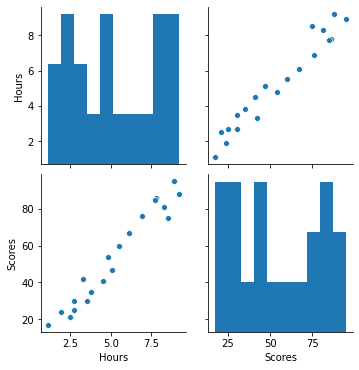

In [11]:
sns.pairplot(df1)

As we can see, a aproximate linear relationship is present between no. of hours and scores which is logically correct :)
We can also see one major insight that Linear Regression model *might* work good on this specific data.

# DATA PREPARATION FOR TRAINING OF ML MODEL:

In [12]:
X_train,y_train=df1[['Hours']],df1[['Scores']]               #DOUBLE BRACKETS INDICATE 2D ARRAY WHICH SKLEARN MODEL TAKES.

In [13]:
from sklearn.preprocessing import StandardScaler       #We have already talked about it. We need to scale hours
scaler=StandardScaler()                                #to reduce error, so as to improve accuracy.
X_train_scaled=scaler.fit_transform(X_train)


# SELECTING & TRAINING OUR ML MODEL:

Since already mentioned, lets first try to fit linear regression on our training set:
Lets import mean_absolute_error,mean_squared_error to calculate Root Mean Square:

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
lin_reg=LinearRegression()

In [17]:
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [18]:
some_hour=X_train.iloc[[-5]]
some_score=y_train.iloc[[-5]]
some_hour_scaled=scaler.transform(some_hour)
lin_reg.predict(some_hour_scaled)

array([[86.25874013]])

In [19]:
some_score

,Scores
3,75


As we can clearly see our model is UNDERFITTING the training data.

In [20]:
y_pred=lin_reg.predict((X_train_scaled))

In [21]:
print('''MAE:\t:{}\nRMSE:\t {}'''.format(mean_absolute_error(y_train,y_pred),np.sqrt(mean_squared_error(y_train,y_pred))))

MAE:	:5.18660170918037
RMSE:	 5.5586133502263415


Lets go a step further and train our linear regression model using CROSS VALIDATION:

In [22]:
from sklearn.model_selection import cross_val_score
scores_lin=cross_val_score(lin_reg,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
lin_rmse=np.sqrt(-scores_lin)
print('''RMSE:\t{}\nMean:\t:{}\nStandard Deviation:\t{}'''.format(lin_rmse,lin_rmse.mean(),lin_rmse.std()))

RMSE:	[5.80272632 6.61255747 5.71501951 6.83521614 5.82350259]
Mean:	:6.157804405423847
Standard Deviation:	0.4689527931487401


In [23]:
#Lets select a more powerful model: DecisionTreeRegressor:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [24]:
y_pred_tree=tree_reg.predict(X_train_scaled)

In [25]:
print('''MAE:\t:{}\nRMSE:\t {}'''.format(mean_absolute_error(y_train,y_pred_tree),np.sqrt(mean_squared_error(y_train,y_pred_tree))))

MAE:	:0.25
RMSE:	 0.7905694150420949


See RMSE has gone too low. This is a case of OVERFITTING the training data.
Decision trees work by fitting multi order polynomial model on data, this is a common in Decision Tree Regressor. :)
Lets cross validate this model to get better results:

In [26]:
scores_tree=cross_val_score(tree_reg,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
tree_rmse=np.sqrt(-scores_tree)
print('''RMSE:\t{}\nMean:\t:{}\nStandard Deviation:\t{}'''.format(tree_rmse,tree_rmse.mean(),tree_rmse.std()))

RMSE:	[5.38516481 7.79422863 8.336666   8.6890736  6.63795902]
Mean:	:7.36861841272565
Standard Deviation:	1.2107694609794777


See its performing worse than Cross-validated Linear Regression model.
Lets import my favourite model : RandomForestRegressor!
RandomForestRegressor works on the concept that it train many decision trees on various subsets of features.

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(random_state=0)            #This is important since we want reproducible output and random_state
rf_reg.fit(X_train_scaled,y_train)                                                        #is by default false

RandomForestRegressor(random_state=0)

In [28]:
y_pred_rf=rf_reg.predict(X_train_scaled)
print('''MAE:\t:{}\nRMSE:\t {}'''.format(mean_absolute_error(y_train,y_pred_rf),np.sqrt(mean_squared_error(y_train,y_pred_rf))))

MAE:	:2.157791666666667
RMSE:	 2.4136173937911347


In [29]:
#This is lesser than that of both linear regressor and decision tree regressor
#Lets cross_validate it:
scores_rf=cross_val_score(rf_reg,X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
rf_rmse=np.sqrt(-scores_rf)
print('''RMSE:\t{}\nMean:\t:{}\nStandard Deviation:\t{}'''.format(rf_rmse,rf_rmse.mean(),rf_rmse.std()))

RMSE:	[3.23362456 7.57193972 5.44946559 6.24767557 6.91568428]
Mean:	:5.883677943012677
Standard Deviation:	1.5006053784373181


It looks better than cross-validated decision tree model(mean:7.37)

# FINE TUNING OUR BEST MODEL:

Our final step in making more best model more perfect is HYPERPARAMETER TUNING:
Hyperparameters are the performance parameters of the model. So, optimizing the hyperparameters is to optimize the performance
improving accuracy and getting low generalization error when unseen data is shown to our model.

Lets import RandomizedSearchCV to see which are optimized hyperparamters
And then choosing 'em in GridSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint            #for generating random numbers between low and high
param_distributribs={'n_estimators' : randint(low=1,high=500)}
random=RandomizedSearchCV(rf_reg,param_distributions=param_distributribs,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=0,return_train_score=True)
random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015508B1AA88>},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [31]:
cv_res=pd.DataFrame(random.cv_results_)

In [32]:
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.161305,0.016825,0.009945,0.003638,173,{'n_estimators': 173},-9.044266,-56.227312,-28.251462,-44.230955,...,-36.608611,16.419372,7,-8.695094,-5.319815,-9.897626,-5.706401,-6.386198,-7.201027,1.785536
1,0.055400,0.008928,0.008799,0.006285,48,{'n_estimators': 48},-10.446308,-57.166697,-28.655518,-40.285807,...,-36.218882,15.786217,3,-10.107229,-5.711869,-10.765850,-6.649821,-6.850799,-8.017114,2.023268
2,0.091031,0.008952,0.007864,0.005140,118,{'n_estimators': 118},-10.157462,-56.371000,-28.569649,-39.851031,...,-36.318208,15.909737,4,-9.363348,-5.413532,-10.031900,-5.634848,-6.482076,-7.385141,1.933128
3,0.166458,0.016964,0.011641,0.006102,193,{'n_estimators': 193},-9.597490,-56.112944,-28.706028,-43.731442,...,-36.319328,15.934705,5,-8.680691,-5.375692,-9.814168,-5.663256,-6.477463,-7.202254,1.745740
4,0.296797,0.024310,0.014860,0.000704,324,{'n_estimators': 324},-10.288264,-55.908381,-27.269700,-43.206683,...,-36.480204,15.994201,6,-8.425419,-4.765895,-9.733499,-5.525123,-6.454190,-6.980825,1.842085
5,0.212243,0.016194,0.012566,0.001743,252,{'n_estimators': 252},-10.472472,-56.669001,-27.778414,-43.395896,...,-36.848177,16.100104,9,-8.511471,-4.986956,-9.716744,-5.630361,-6.349219,-7.038950,1.789381
6,0.164707,0.019650,0.008986,0.006238,196,{'n_estimators': 196},-9.235622,-55.793869,-28.116788,-43.816405,...,-36.104335,16.052753,2,-8.765619,-5.357176,-9.875131,-5.712885,-6.518956,-7.245953,1.770213
7,0.374593,0.034903,0.020641,0.003393,360,{'n_estimators': 360},-10.287719,-56.394565,-27.290578,-43.511997,...,-36.665389,16.149283,8,-8.347305,-4.722161,-9.649546,-5.570879,-6.457735,-6.949525,1.808180
8,0.009471,0.000400,0.001803,0.000404,10,{'n_estimators': 10},-7.672500,-69.037500,-32.917500,-53.975000,...,-39.166281,20.931414,10,-12.336875,-6.867500,-13.046250,-8.230000,-6.297578,-9.355641,2.804212
9,0.187843,0.029373,0.011778,0.001981,212,{'n_estimators': 212},-9.005418,-55.428319,-27.156442,-43.219395,...,-35.890311,16.193325,1,-9.015387,-5.465542,-10.148432,-5.836459,-6.683170,-7.429798,1.836276


In [33]:
res=cv_res.loc[:,['params','mean_test_score']]

In [34]:
res['RMSE']=np.sqrt(np.abs(res['mean_test_score']))

In [35]:
res

,params,mean_test_score,RMSE
0,{'n_estimators': 173},-36.608611,6.050505
1,{'n_estimators': 48},-36.218882,6.018212
2,{'n_estimators': 118},-36.318208,6.026459
3,{'n_estimators': 193},-36.319328,6.026552
4,{'n_estimators': 324},-36.480204,6.039884
5,{'n_estimators': 252},-36.848177,6.070270
6,{'n_estimators': 196},-36.104335,6.008688
7,{'n_estimators': 360},-36.665389,6.055195
8,{'n_estimators': 10},-39.166281,6.258297
9,{'n_estimators': 212},-35.890311,5.990852


As we can see, we are getting lesser RMSE if n_estimators(no. of decision trees) is high(212). After that 
again RMSE increases.
Lets manually take set of hyperparameters('n_estimators') close to 212 so as to get optimized results in
GridSearchCV

In [36]:
param_grid={'n_estimators':list(range(200,221))}
grid_scv=GridSearchCV(rf_reg,param_grid,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
grid_scv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'n_estimators': [200, 201, 202, 203, 204, 205, 206,
                                          207, 208, 209, 210, 211, 212, 213,
                                          214, 215, 216, 217, 218, 219, 220]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
cv_res1=pd.DataFrame(grid_scv.cv_results_)

In [38]:
res1=cv_res1.loc[:,['params','mean_test_score']]

In [39]:
res1['RMSE']=np.sqrt(np.abs(res1['mean_test_score']))

In [40]:
res1

,params,mean_test_score,RMSE
0,{'n_estimators': 200},-36.107569,6.008957
1,{'n_estimators': 201},-36.162353,6.013514
2,{'n_estimators': 202},-36.026974,6.002247
3,{'n_estimators': 203},-36.090795,6.007561
4,{'n_estimators': 204},-36.110608,6.009210
5,{'n_estimators': 205},-36.130148,6.010836
6,{'n_estimators': 206},-36.115650,6.009630
7,{'n_estimators': 207},-36.159873,6.013308
8,{'n_estimators': 208},-36.012420,6.001035
9,{'n_estimators': 209},-35.975103,5.997925


In [41]:
grid_scv.best_estimator_

RandomForestRegressor(n_estimators=211, random_state=0)

Look this is importance of GridSearchCV. If I had stopped at RandomizedSearchCV I would have gotten RMSE=5.99 corresponding
to 'n_estimators=212' 
After applying GridSearchCV, I got RMSE=5.982 corresponding to 'n_estimators=211'. GREAT!

In [42]:
final_model=grid_scv.best_estimator_

# FINAL STEP:TESTING OUR FINE TUNED BEST MODEL

In [43]:
X_test,y_test=test_set[['Hours']],test_set[['Scores']]

In [44]:
X_test_scaled=scaler.transform(X_test)

In [45]:
final_predictions=final_model.predict(X_test_scaled)

In [46]:
print('''MAE:\t:{}\nRMSE:\t {}'''.format(mean_absolute_error(y_test,final_predictions),np.sqrt(mean_squared_error(y_test,final_predictions))))

MAE:	:7.069194312796209
RMSE:	 8.942552472642223


In [47]:
final_model.predict([[9.25]])

array([88.99052133])

So, according to the data provided, if a student studies for 9.25hrs/day, he should be getting 89 marks to be exact.

# BONUS PREDICTION BY LINEAR REGRESSION MODEL:

In [48]:
y_pred=lin_reg.predict(X_test_scaled)
print('''MAE:\t:{}\nRMSE:\t {}'''.format(mean_absolute_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))))

MAE:	:4.18385989900298
RMSE:	 4.64744761210037


In [49]:
lin_reg.predict(scaler.transform([[9.25]]))

array([[93.69173249]])